In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

# Ignore all warning messages
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('C:\\Users\\Dell\\Desktop\\Data Science\\IRIS Flower.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
106,4.9,2.5,4.5,1.7,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
38,4.4,3.0,1.3,0.2,Iris-setosa
130,7.4,2.8,6.1,1.9,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
print('Number Of Rows  ==',data.shape[0])
print('Number Of columns  ==',data.shape[1])

Number Of Rows  == 150
Number Of columns  == 5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

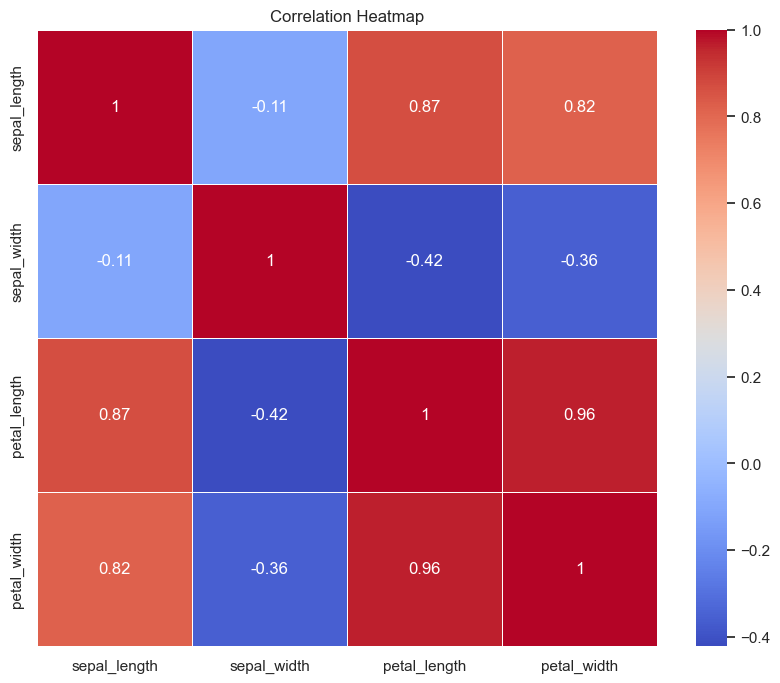

In [14]:
sns.set(style="whitegrid")
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

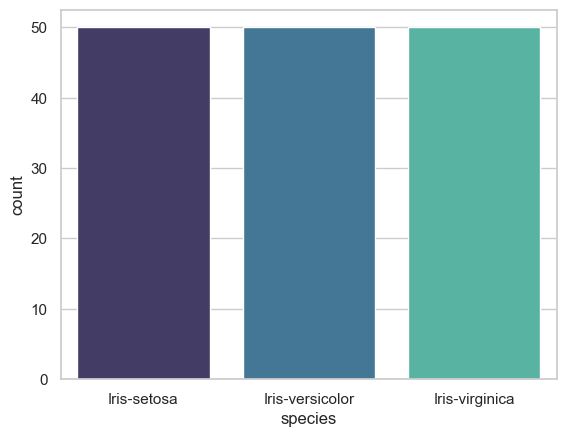

In [17]:
sns.countplot(data["species"],palette="mako")
plt.show()

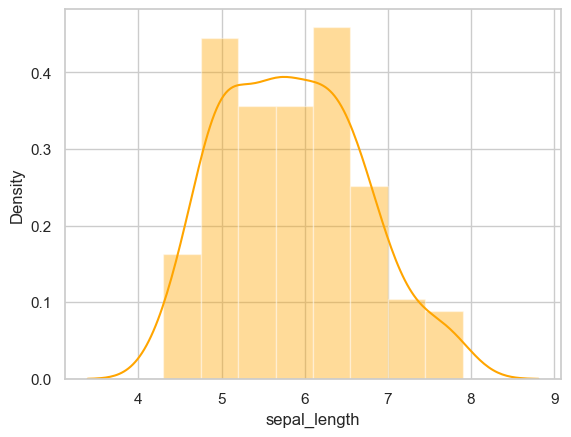

In [18]:
sns.distplot(data["sepal_length"],color="orange",kde=True)
plt.show()

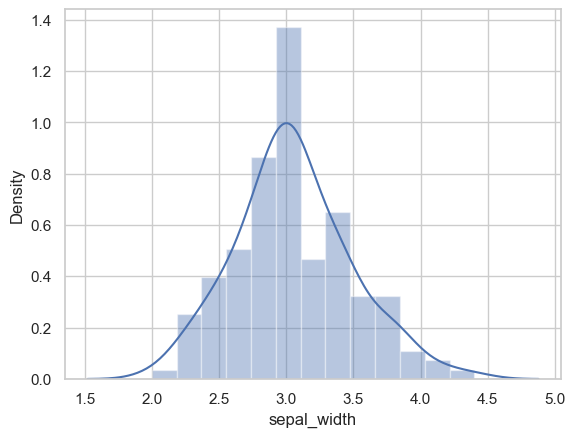

In [19]:
sns.distplot(data["sepal_width"],kde=True)
plt.show()

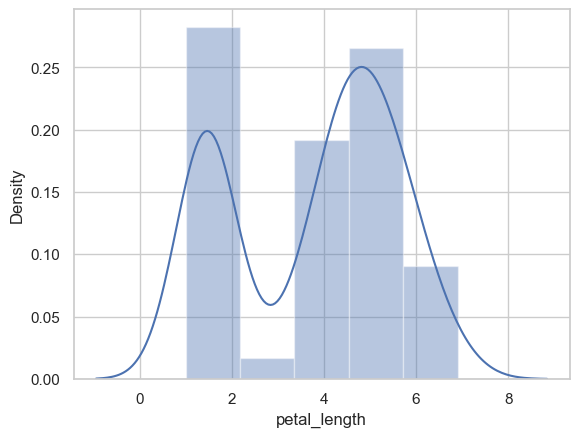

In [20]:
sns.distplot(data["petal_length"],kde=True)
plt.show()

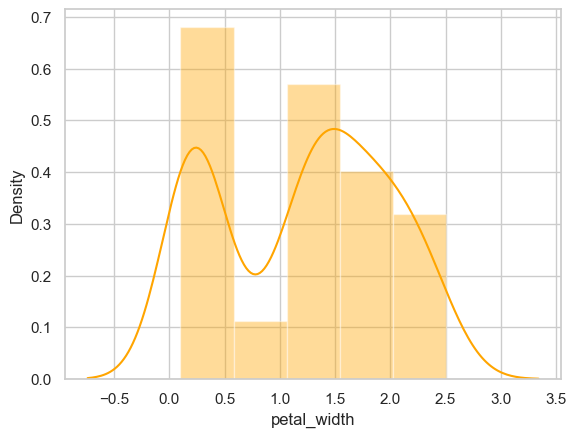

In [22]:
sns.distplot(data["petal_width"],color="orange",kde=True)
plt.show()

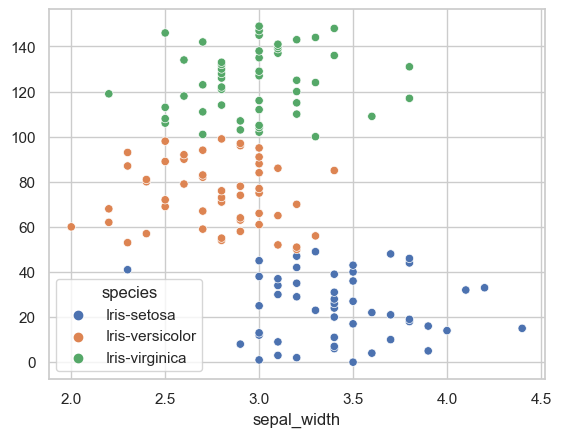

In [31]:
sns.scatterplot(x="sepal_width",y=data.index,data=data,hue="species")
plt.show()

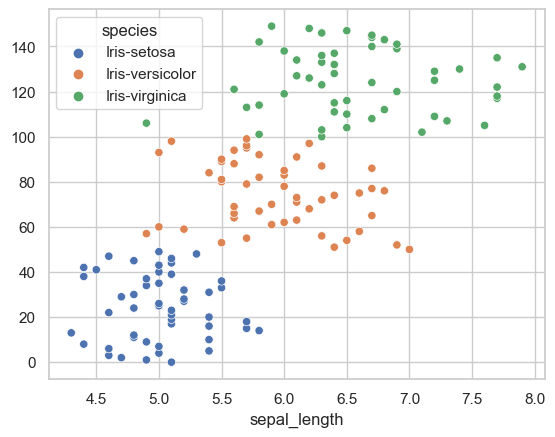

In [33]:
sns.scatterplot(x="sepal_length",y=data.index,data=data,hue="species")
plt.show()

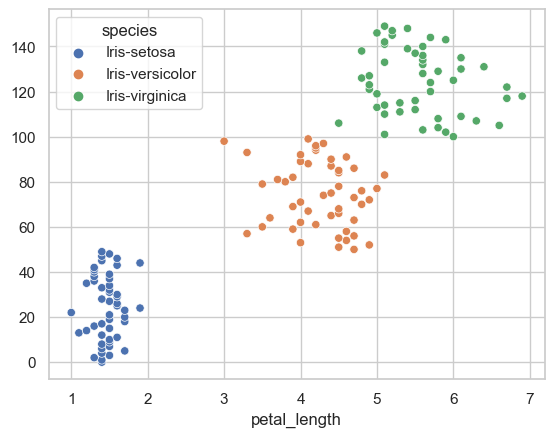

In [34]:
sns.scatterplot(x="petal_length",y=data.index,data=data,hue="species")
plt.show()

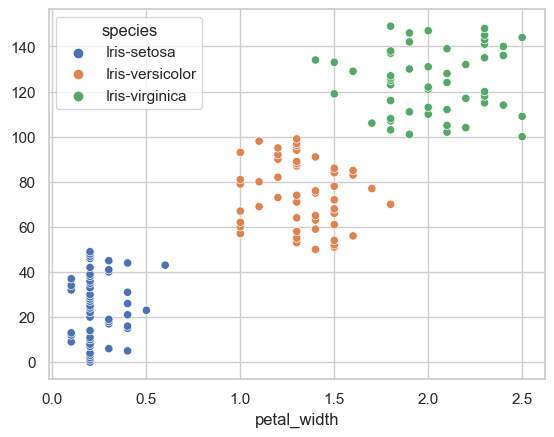

In [35]:
sns.scatterplot(x="petal_width",y=data.index,data=data,hue="species")
plt.show()

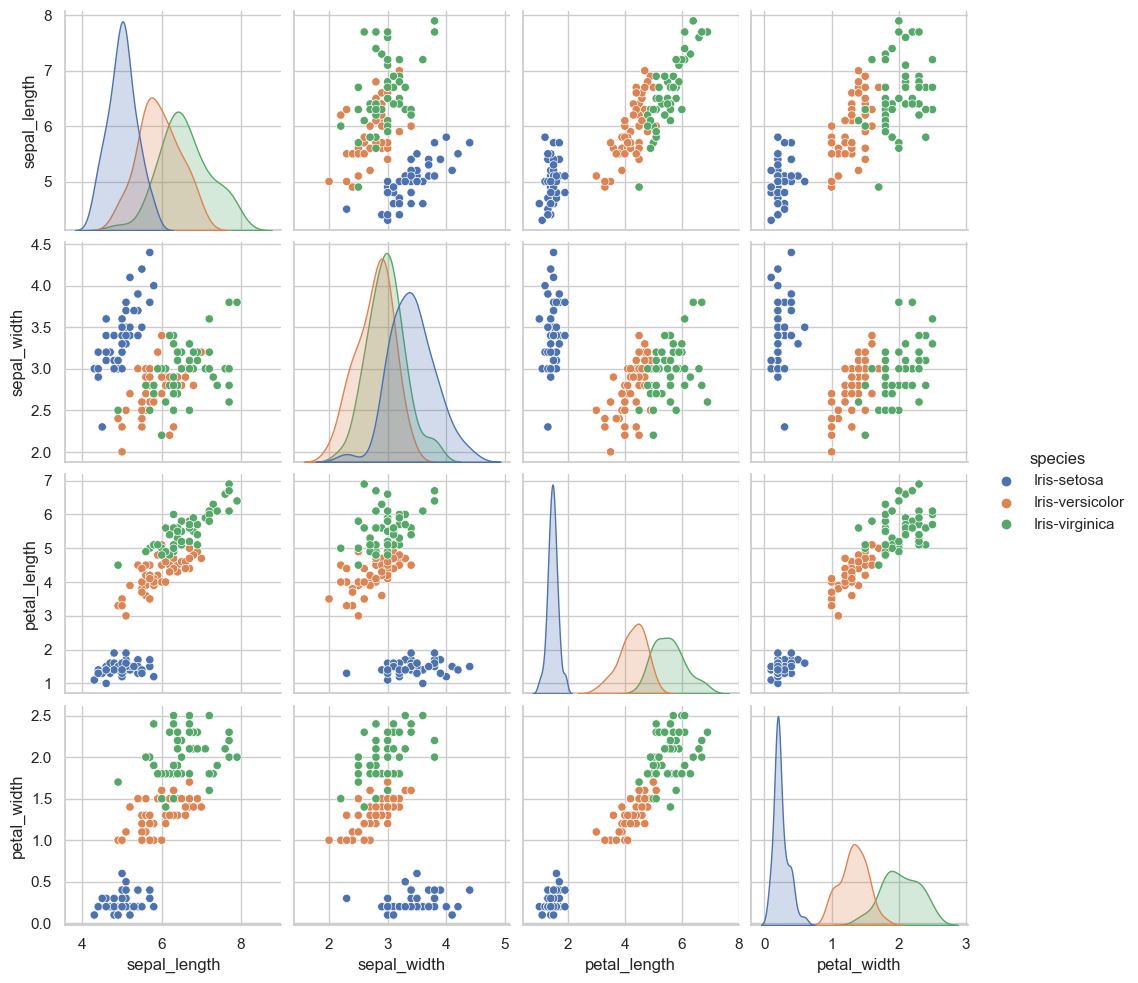

In [36]:
sns.pairplot(data=data,hue="species")
plt.show()

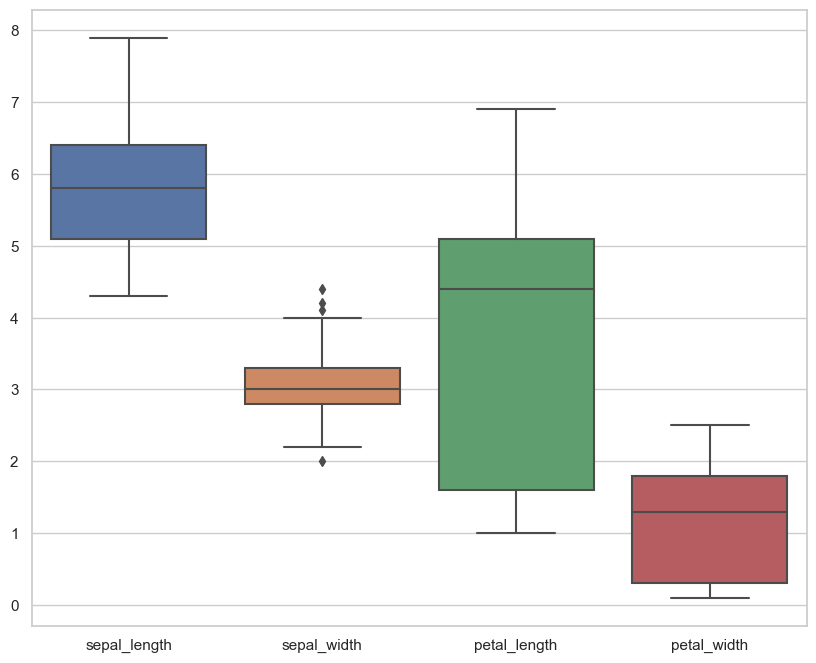

In [44]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.show()

In [38]:
data.duplicated().sum()

3

In [41]:
data.drop_duplicates(inplace=True)

In [42]:
data.duplicated().sum()

0

In [93]:
encoder=LabelEncoder()

In [94]:
data["species"]=encoder.fit_transform(data["species"])
data["species"].value_counts()

1    50
2    49
0    48
Name: species, dtype: int64

In [95]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [96]:
x=data.drop(columns=["species"],axis=1)
y=data["species"]

In [97]:
print(x)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[147 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int64


In [99]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,0
83,6.0,2.7,5.1,1.6,1
65,6.7,3.1,4.4,1.4,1
127,6.1,3.0,4.9,1.8,2
87,6.3,2.3,4.4,1.3,1


In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [101]:
print(x.shape,x_train.shape,x_test.shape)

(147, 4) (102, 4) (45, 4)


In [102]:
model=LogisticRegression()

In [103]:
model.fit(x_train,y_train)

LogisticRegression()

In [104]:
model.predict(x_test)

array([1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2,
       0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2,
       0], dtype=int64)

In [105]:
model.score(x_train,y_train)*100

98.0392156862745

In [106]:
model.score(x_test,y_test)*100

97.77777777777777